In [1]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [2]:
mkta = pd.read_csv('marketing.csv')

In [3]:
mkta.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,01-01-2018,House Ads,personalization,True,English,English,0-18 years,01-01-2018,NaN,House Ads,True
1,a100000030,01-01-2018,House Ads,personalization,True,English,English,19-24 years,01-01-2018,NaN,House Ads,True
2,a100000031,01-01-2018,House Ads,personalization,True,English,English,24-30 years,01-01-2018,NaN,House Ads,True
3,a100000032,01-01-2018,House Ads,personalization,True,English,English,30-36 years,01-01-2018,NaN,House Ads,True
4,a100000033,01-01-2018,House Ads,personalization,True,English,English,36-45 years,01-01-2018,NaN,House Ads,True


In [4]:
hrt = pd.read_csv('heart.csv')

In [6]:
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### skewness kurtosis

In [9]:
mean_chol = hrt['chol'].mean()
median_chol = hrt['chol'].median()
std = hrt['chol'].std()

skewness = (3 * (mean_chol - median_chol)) / std


In [10]:
print(skewness)

0.34888785073774436


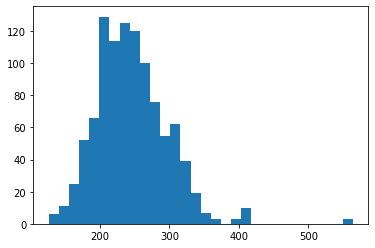

In [15]:
import matplotlib.pyplot as plt

plt.hist(hrt['chol'], bins=30)
plt.show()
 

In [16]:
kurtosis = hrt['chol'].kurtosis()
print(kurtosis)

3.9968030492724647


# iloc

In [21]:
hrt.iloc[:5,:4]

,age,sex,cp,trestbps
0,52,1,0,125
1,53,1,0,140
2,70,1,0,145
3,61,1,0,148
4,62,0,0,138


In [24]:
hrt.loc[:5,'trestbps']

0    125
1    140
2    145
3    148
4    138
5    100
Name: trestbps, dtype: int64

In [ ]:
# selecting marketing_channel with 'House Ads' and language_preferred 'English'
display(mkta.loc[(mkta.marketing_channel == 'House Ads') & (mkta.language_preferred == 'English')])

In [35]:
# updating values of Mileage if Year < 2015 
hrt.loc[(hrt.age > 60), ['sex']] = 'others'
print(hrt.head()) 

   age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   52       1   0       125   212    0        1      168      0      1.0   
1   53       1   0       140   203    1        0      155      1      3.1   
2   70  others   0       145   174    0        1      125      1      2.6   
3   61  others   0       148   203    0        1      161      0      0.0   
4   62  others   0       138   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


In [42]:
hrt.iloc[:5,1:5]

,sex,cp,trestbps,chol
0,1,0,125,212
1,1,0,140,203
2,others,0,145,174
3,others,0,148,203
4,others,0,138,294


# fit transform

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
X = hrt.drop(['target','sex'],axis=1 )

In [51]:
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,0,125,212,0,1,168,0,1.0,2,2,3
1,53,0,140,203,1,0,155,1,3.1,0,0,3
2,70,0,145,174,0,1,125,1,2.6,0,0,3
3,61,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,138,294,1,1,106,0,1.9,1,3,2


In [53]:
X_fit=scaler.fit(X)
X_scaled=scaler.transform(X)
d = pd.DataFrame(X_scaled)

In [ ]:
# Use fit_transform() function directly and verify the results
X_scaled=scaler.fit_transform(X)
pd.DataFrame(X_scaled)

# enumerate

In [55]:
for idx, col in enumerate(mkta.columns):
    if mkta[col].isnull().any():
        print(f"Column {idx} ({col}) has missing values.")

Column 1 (date_served) has missing values.
Column 2 (marketing_channel) has missing values.
Column 4 (converted) has missing values.
Column 8 (date_subscribed) has missing values.
Column 9 (date_canceled) has missing values.
Column 10 (subscribing_channel) has missing values.
Column 11 (is_retained) has missing values.


# shallow vs deep copy

In [56]:
heartstroke_shallow = hrt.copy(deep=False)
# Perform temporary operations, e.g., normalizing column values
heartstroke_shallow['age'] = heartstroke_shallow['age'] / heartstroke_shallow['age'].max()
# This change will also reflect in the original 'heartstroke' DataFrame.


In [57]:
heartstroke_shallow.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.675325,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,0.688312,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,0.909091,others,0,145,174,0,1,125,1,2.6,0,0,3,0
3,0.792208,others,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0.805195,others,0,138,294,1,1,106,0,1.9,1,3,2,0


In [58]:
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,others,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,others,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,others,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
mk_copy = mkta.copy(deep=True)
# Modify 'heartstroke_copy' without affecting 'heartstroke'
mk_copy['converted'] = mk_copy['converted'].fillna(mk_copy['converted'].mean())
# Original 'heartstroke' remains unchanged.


In [61]:
mk_copy.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64